# Project EEG Emotion LDA/ SVM Analysis
## COGS 189: Brain Computer Interfaces
## Winter 23, Instructor: Alessandro D'Amico

The main purpose of this assignment:

## Install EEGLAB
We only need to do this one time, but let's install EEGLAB. Execute the following line of code:

In [7]:
![ ! -d './eeglab' ] && git clone --recursive --depth=1 https://github.com/sccn/eeglab.git

## Setup
The code under here shouldn't be removed, but can be added to. Essentially it's just setting up our environment, loading libraries/toolboxes and getting things ready.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mne

In [2]:
imatlab_export_fig('print-png') % allows us to inline plot
% EEGLAB is installed above in the 'Install EEGLAB' section.
addpath(genpath('eeglab'));


Let's confirm that we're able to locate EEGLAB by executing the following command. If this doesn't work, please check Piazza/Canvas for solutions or to ask for help.

In [3]:
eeg_getversion()


ans =

    '2023.0'



You should see a version number. As of 23Jan23 this should return `'2022.1'`. If you see any version number you're ready to continue with the assignment!

## Part 1: Loading the Data
Load in the synthetic data `SynthData.set` using EEGLAB's `pop_loadset()` function. The EEG data collected was sampled at 500 Hz. For those unfamiliar: 

$Hz = \frac{1}{second}$

Which means we collect 500 points of data per second at a data collection rate of 500 Hz.
This is referred to as the **sampling rate**, and is often denoted as: $F_s$ or $f_s$. EEGLAB stores this information under `EEG.srate`.

In [4]:
% Load data and use the EEG object to answer the following questions

SYNTH = pop_loadset('SynthData.set')
EEG = pop_loadset('sub-01_eeg_sub-01_task-ImaginedEmotion_eeg.set')


pop_loadset(): loading file SynthData.set ...
Reading float file 'SynthData.fdt'...

SYNTH = 

  struct with fields:

             setname: ''
            filename: 'SynthData.set'
            filepath: ''
             subject: ''
               group: ''
           condition: ''
             session: []
            comments: ''
              nbchan: 34
              trials: 1
                pnts: 43303
               srate: 500
                xmin: 0
                xmax: 86.6040
               times: [0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 ... ]
                data: [34x43303 single]
              icaact: []
             icawinv: []
           icasphere: []
          icaweights: []
         icachansind: []
            chanlocs: [1x34 struct]
          urchanlocs: []
            chaninfo: [1x1 struct]
                 ref: 'common'
               event: [1x11 struct]
             urevent: []
    eventdescription: {''  ''  ''}
               epoch: []
    epochdescription:

In [ ]:
#!conda install --channel=conda-forge --name=base mamba

#### Answer the following questions on Gradescope

**Question 1:** How many channels are in this dataset?

**Question 2:** What is the sampling rate of this dataset?
* 256
**Question 3:** What is the duration of this dataset (to the nearest second)

**Question 4:** Plot the first 1000 msec (1 sec) of data from every channel. Make sure the x-axis (time) is accurate. 

* Label your x-label as "Time (ms)" and y-axis as "Amplitude (uV)"

* *(hint: Use EEG.data and EEG.times and be careful with the dimensions)*

* *(you can simply plot such that all channels overlay each other)*

* **Save your plot and upload it to Gradescope**

In [5]:
length(EEG.times(1,:))/EEG.srate
length(SYNTH.times);


ans =

        4509



### ToDo: Figure out which part they evoked the emotions 
* Below This Cell is One channel with all the data point from start to finish of the recording.

## Example: Find Frustration which is onset 1034.609
* Link for Emotion Experiment Instructions [Here](https://openneuro.org/datasets/ds003004/versions/1.1.1/file-display/sub-01:eeg:sub-01_task-ImaginedEmotion_events.json)

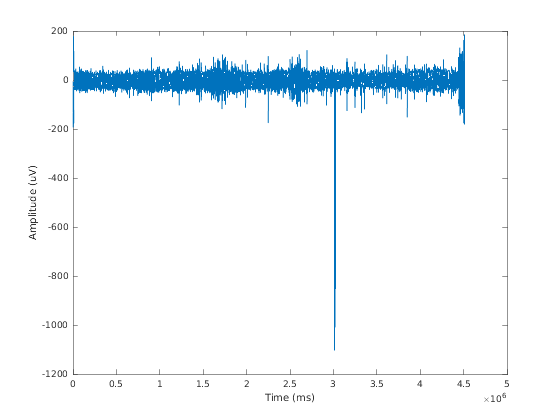

In [6]:
% You can use this cell to plot, or you can do it above.

%Does it matter which channels? It is IC Independent component

plot(EEG.times, EEG.data(1,:))
xlabel('Time (ms)')
ylabel('Amplitude (uV)')

## Part 2: Filtering
The data we have is contaminated (intentionally) with high frequency noise. Let's isolate our main signal by utilizing a 30 Hz lowpass filter.

For EEG data analysis, there are various decisions that need to be made when selecting an appropriate filter. All signals are corrupted by outside noise, and EEG data is particularly susceptible to noise from AC electronics, muscle movements, and skin conductance changes (sweat). Filtering allows us to get rid of some of the junk, but it is not magic. There is no substitute for collecting clean data. Filtering will also throw out some of the data we care about, and one of the goals is to minimize how much of the signal we are modifying.

**Question 5:** Apply a 30 Hz FIR filter (using EEGLAB's `pop_eegfiltnew()`) and save the output to the `EEG` variable. Plot the filtered data using the same time window as Question 4.
* *hint: refer to Week 2 Friday's lecture. Typing `pop_eegfiltnew()` will show you viable inputs*
* **Save your plot and upload it to Gradescope**

In [15]:
% Q5 answer here
EEG = pop_eegfiltnew(EEG, 'hicutoff',30)


pop_eegfiltnew() - performing 115 point lowpass filtering.
pop_eegfiltnew() - transition band width: 7.5 Hz
pop_eegfiltnew() - passband edge(s): 30 Hz
pop_eegfiltnew() - cutoff frequency(ies) (-6 dB): 33.75 Hz
pop_eegfiltnew() - filtering the data (zero-phase, non-causal)
firfilt(): |                    |   =                   /   5%, ETE 01:=                  -  10%, ETE 00:5=                 \  15%, ETE 00:=                |  20%, ETE 00:4=               /  25%, ETE 00:=              -  30%, ETE 00:3=             \  35%, ETE 00:=            |  40%, ETE 00:3=           /  45%, ETE 00:=          -  50%, ETE 00:3=         \  55%, ETE 00:=        |  60%, ETE 00:2=       /  65%, ETE 00:=      -  70%, ETE 00:1=     \  75%, ETE 00:=    |  80%, ETE 00:1=   /  85%, ETE 00:=  -  90%, ETE 00:0= \  95%, ETE 00:=| 100%, ETE 00:00

EEG = 

  struct with fields:

             setname: 'Merged datasets'
            filename: 'sub-01_eeg_sub-01_task-ImaginedEmotion_eeg.set'
            filepath: ''
 

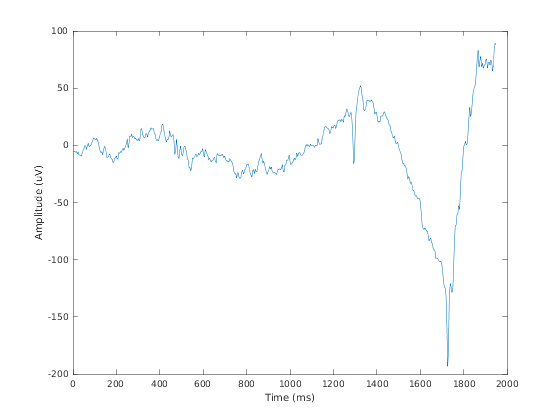

In [7]:
plot(EEG.times(1,1:500), EEG.data(1,1:500))
xlabel('Time (ms)')
ylabel('Amplitude (uV)')

## Part 3: Epoching
We will now investigate the events we have in our dataset and epoch to these events.

The events themselves can be found in `EEG.event`, which contains information about the type of event (`EEG.event.type`) and when the event ocurred (`EEG.event.latency`). In the case of our stimuli, the duration, which is the third field, will always be equal to `1`.

It is good to note that the values stored in `EEG.event.latency` are indices of `EEG.times` and are not themselves temporal values.

Let's explore the events with the following:

*Hint: you can capture all of the events that are in `EEG.event.type` by putting them in a cell array via `x = {EEG.event.type}`*

**Question 6:** What is the label of the very first event?

**Question 7:** How many events are there in total?

**Question 8:** How many unique events are there?

In [13]:
% Answer Q6 -> 8 here
EEG.event.type


ans =

    'InitialInstructions'


ans =

    'prebase_instruct'


ans =

    'prebase'


ans =

    'exit'


ans =

    'FeelingItInstructionsButton'


ans =

    'InstructionsForEnding'


ans =

    'relax'


ans =

    'ImaginationSuggestions'


ans =

    'enter'


ans =

    'awe'


ans =

    'press1'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'exit'


ans =

    'enter'


ans =

    'frustration'


ans =

    'press1'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'exit'


ans =

    'enter'


ans =

    'joy'


ans =

    'press1'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    'press'


ans =

    '

Using regular expression
pop_epoch():14 epochs selected
Epoching...
pop_epoch():14 epochs generated
Scaling components to RMS microvolt
Scaling components to RMS microvolt
pop_epoch(): checking epochs for data discontinuity


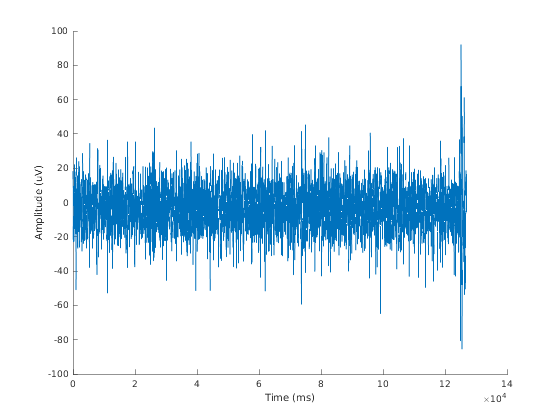

In [20]:
epoch0_data = pop_epoch(EEG, 'press1', [0, 127]);
epoch_times = epoch0_data.times;



hold on
plot(epoch_times, epoch0_data.data(1, :, 1)) %The : in data() represents all the data in "awe" emotions
xlabel('Time (ms)')
ylabel('Amplitude (uV)')
hold off


In this case, the first marker is sent only one time and it serves as an indicator that recording has commenced. The remaining markers contain useful information as they represent a specific event occurring. We can extract the EEG activity relative to that information in a process known as binning, grouping, or epoching (which we'll use here).

Epoching is the step of pre-processing where we segment the data into the chunks we care about. We are only interested in the brief periods of time the participant has seen the stimulus. When epoching data, we must decide how much data is worth keeping. Our data in this case are synthetic and not collected from an actual experiment. In reality, the nature of the experiment will determine the length of your epoch, but it's not uncommon to look at signals a few hundred milliseconds before event onset all the way out to 1000 milliseconds after onset.

The window of time before the onset typically contains **baseline** information. Baseline activity should reflect task unrelated neurological activity that was can use to standardize each of our trials to. In traditional experiments, the baseline is often chosen during a time when participants are looking at a blank screen before they're presented with the next trial. Our synthetic example does not require baseline correction so we'll save that for next assignment.

In order to explore our waveforms, we'll define an epoch with the following parameters:
* Epoch start: 500 ms before event (stimulus) onset.
* Epoch end: 1000 ms after stimulus onset.

Once these parameters have been decided, we can epoch the data using the event codes using the function `pop_epoch()`

**Question 9:** Epoch the remaining events into their own variables (e.g. epoch0 and epoch1) after filling out the epoching parameters (take special note of the units). After you epoch, you ***must*** save the following data into these variables:
* `epoch0_data`: should contain the `.data` from `epoch0`
* `epoch1_data`: should contain the `.data` from `epoch1`
* `epoch_times`: should contain the `.times` from EITHER `epoch0` or `epoch1` (the data are the same)

After which, plot the first occurence of each epoched type in a plot and submit this. Plot only the first channel.

**Save the plot and submit it as the answer to this question in Gradescope.**

*note 1: the dimensionality of `epoch.data` is as follows: Number of channels $\times$ Number of time points $\times$ Number of epochs*

*note 2: you can plot two traces on the same figure by using the command `hold on`*

In [ ]:
% Answer Q9 Here

We're almost done! For the final piece of this assignment, we'll import the data into Python for plotting.

Note: Subsequent assignments will utilize Python more.

**Question 10:** Transfer the necessary data over (i.e. your all of your `epoch0_data`, `epoch1_data`,  `epoch_times`) to Python using the `%get` magic and plot the data.

**Save the plot and submit it as the answer to this question in Gradescope.**

In [ ]:
# Answer Q10 here!
# Remember, we're in Python now. Index with [] and plot with plt.plot()
# If epoch0_data and epoch1_data are not behaving well, you can cast them to numpy arrays with:
# epoch0_data = np.array(epoch0_data)